## Laboratory Experiment 006: Impulse signal
# Jayvie Severo BSCpE - 3A
An impulse signal is made up of a single sample value of 1 in an infinitely long stream of zeros. You can think about it as a burst of energy, which arrives very quickly, and which dissipates just as quickly.

Let's see how we can visualize the impulse signal and generate one. But first, let's pull in some required dependencies

In [1]:
conda install -c conda-forge pandoc

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3\envs\DSP11-CPE3A

  added / updated specs:
    - pandoc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.6.0              |       h725018a_0         9.0 MB  conda-forge
    pandoc-3.8.3               |       h57928b3_0        25.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        34.5 MB

The following NEW packages will be INSTALLED:

  pandoc             conda-forge/win-64::pandoc-3.8.3-h57928b3_0 

The following packages will be UPDATED:

  openssl              pkgs/main::openssl-3.0.18-h543e019_0 --> conda-forge::openssl-3.6.0-h725018a_0 



pandoc-3.8.3         | 25.5 MB   |          



==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
conda install nbconvert

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3\envs\DSP11-CPE3A

  added / updated specs:
    - nbconvert


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nbconvert-7.16.6           |  py312haa95532_0           9 KB
    nbconvert-pandoc-7.16.6    |  py312haa95532_0           9 KB
    ------------------------------------------------------------
                                           Total:          17 KB

The following NEW packages will be INSTALLED:

  nbconvert          pkgs/main/win-64::nbconvert-7.16.6-py312haa95532_0 
  nbconvert-pandoc   pkgs/main/win-64::nbconvert-pandoc-7.16.6-py312haa95532_0 



nbconvert-pandoc-7.1 | 9 KB      |            |   0% 

nbconvert-7.16.6     | 9 KB      |            |   0% 
nbconvert-pandoc-7.1 | 9 KB    



==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
pip install SciencePlots

Note: you may need to restart the kernel to use updated packages.


In [4]:
import scienceplots
import numpy as np
import matplotlib.pyplot as plt

# If the line below is giving you compiler errors, comment it out.
plt.style.use(['science', 'notebook', 'grid'])

<function matplotlib.pyplot.show(close=None, block=None)>

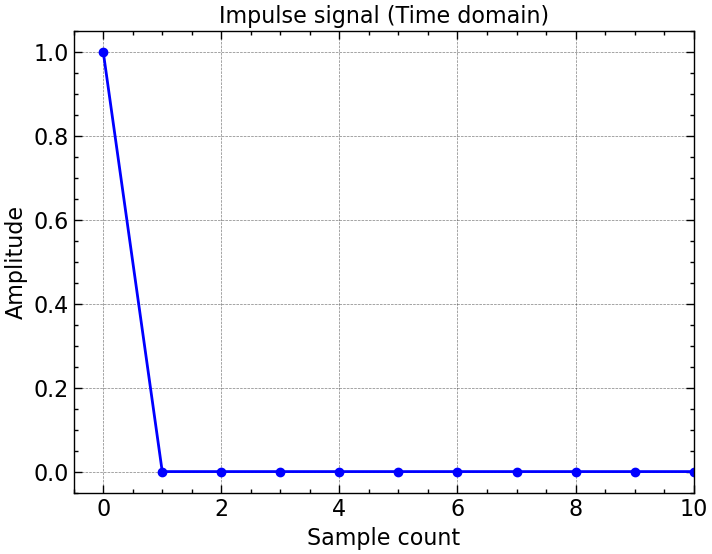

In [5]:
frameSize = 1024

impulse = np.zeros(frameSize)
impulse[0] = 1;

plt.plot(impulse, 'bo-')
plt.xlabel('Sample count')
plt.ylabel('Amplitude')
plt.xlim(-0.5, 10)
plt.title("Impulse signal (Time domain)")

plt.show

Let's listen to what the impulse signal sounds like

In [6]:
from IPython.display import Audio

sampleRate = 44100
audio = Audio(data=impulse, rate=sampleRate)
audio

### Frequency analysis of impulse signal

Performing Fourier analysis (FFT) we can see the frequency representation of the impulse signal which reveals that all represetnable frequencies are present within this impulse signal

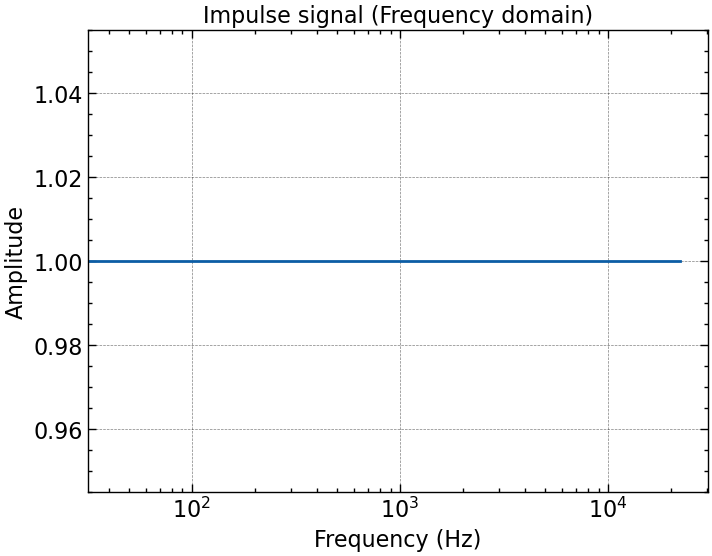

In [7]:
from scipy.fftpack import fft

spectrum = fft(impulse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)
y = np.abs(spectrum)[:spectrum.size//2]
plt.plot(x, y)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Impulse signal (Frequency domain)')
plt.show()

Why do impulse signals contain all possible sinusoids? Let's try and think about it the other way around. What would a signal look like when you add all possible sinusoids together?  

### Sum of cosines

Let's take a sample rate of 400. And let's add sinusoids together starting from a sinusoid of frequency 1, all the way to a sinusoid of frequency 200 (Nyquist frequency). What do you think we'd get?



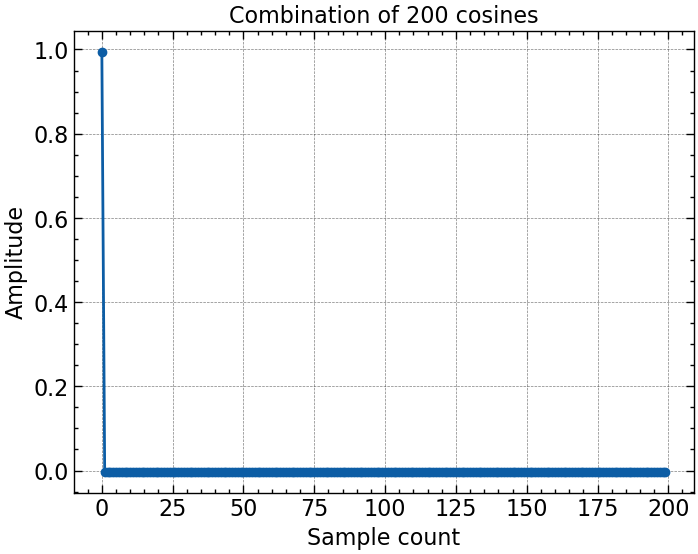

In [8]:
sampleRate = 400
freq = 200

arr = np.linspace(0, freq, sampleRate)
combination = np.zeros(sampleRate)
for f in range(1, freq):
    combination += np.cos(2 * np.pi * f * arr)
combination /= freq

plt.plot(combination[:combination.size//2], 'o-')
plt.xlabel('Sample count')
plt.ylabel('Amplitude')
#plt.xlim(-0.5, 10)
plt.title("Combination of " + str(freq) + " cosines")
plt.show()

### An alternate approach: Sinc function

Here's an alternative way of taking a function in continuous time and converting it into an impulse signal in discrete time. The <b>sinc function</b>. The normalized form of the sinc function (which is the default form in NumPy) can be used, and when plotted on integral sample points, we get an impulse signal. 


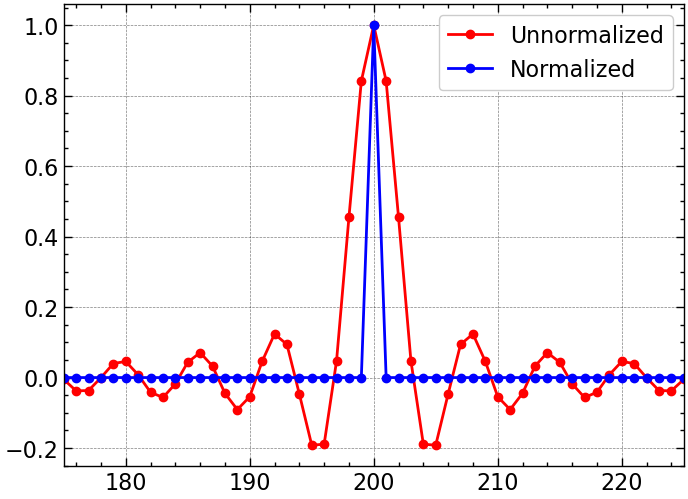

In [9]:
arr = np.arange(-200, 200, 1)
sincNormalized = np.sinc(arr)
sincUnnormalized = np.sinc(arr/np.pi)
plt.plot(sincUnnormalized, 'ro-', label='Unnormalized')
plt.plot(sincNormalized, 'bo-', label='Normalized')
plt.xlim(175,225)
plt.show
plt.legend()